In [1]:
library(rstan)
library(brms)

rstan_options(auto_write=TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: Rcpp

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Loading 'brms' package (version 2.10.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:rstan’:

    loo




In [2]:
head(esoph)

,agegp,alcgp,tobgp,ncases,ncontrols
,<ord>,<ord>,<ord>,<dbl>,<dbl>
1,25-34,0-39g/day,0-9g/day,0,40
2,25-34,0-39g/day,10-19,0,10
3,25-34,0-39g/day,20-29,0,6
4,25-34,0-39g/day,30+,0,5
5,25-34,40-79,0-9g/day,0,27
6,25-34,40-79,10-19,0,7


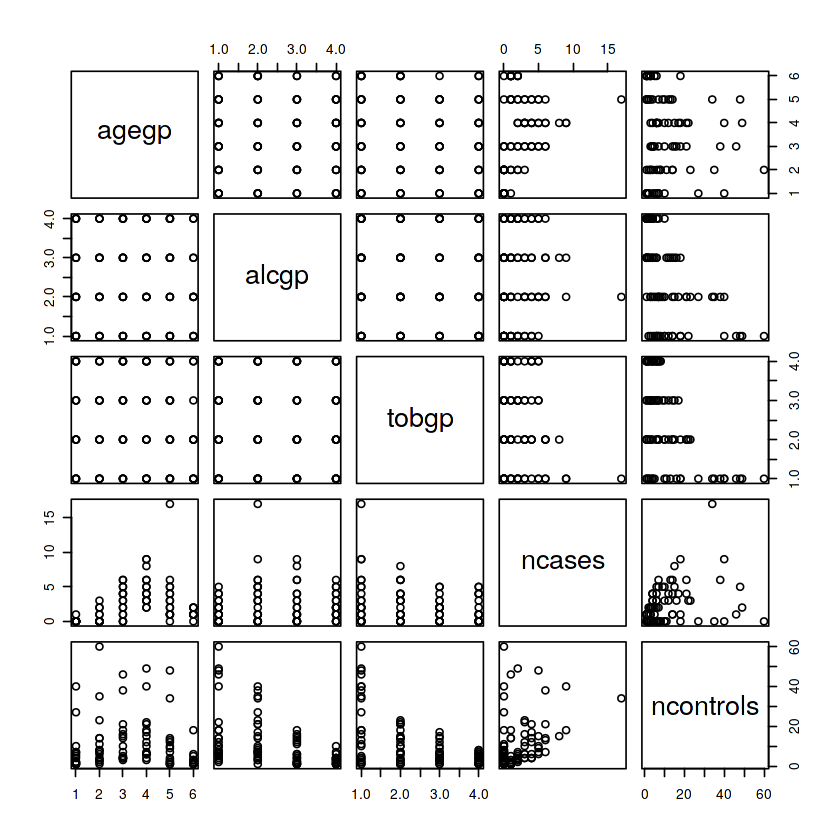

In [3]:
plot(esoph)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




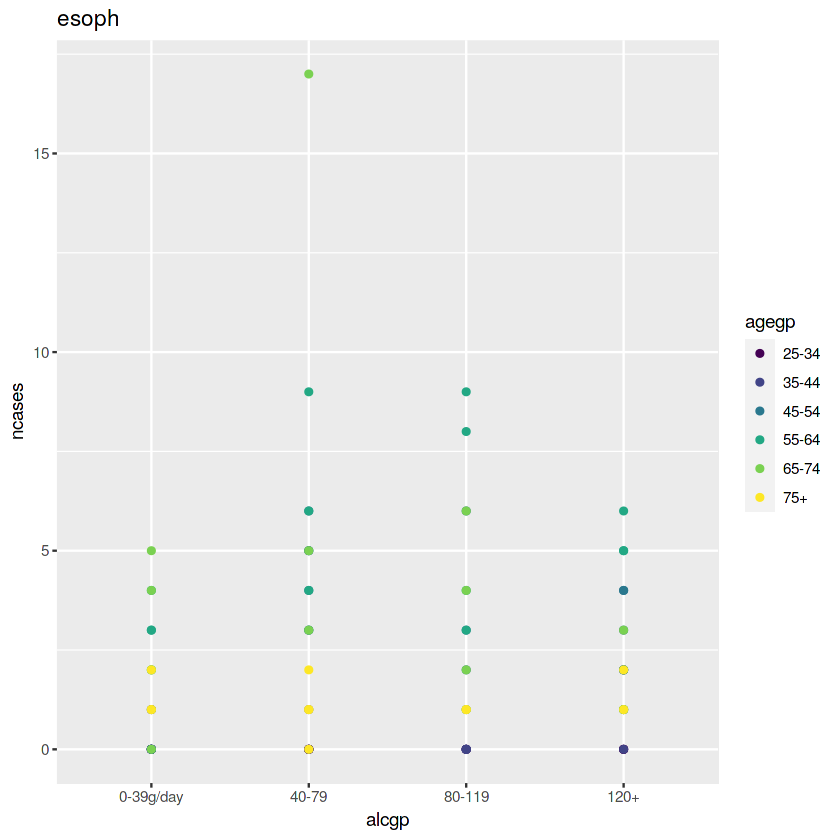

In [4]:
# 使いたい列だけ抽出して内容の確認
library(dplyr)
df <- select(.data = esoph, agegp, alcgp, tobgp, ncases)
ggplot(data=df, mapping = aes(x=alcgp, y=ncases)) + geom_point(aes(color = agegp))+ labs(title="esoph")

In [6]:
glmm_poiss_brms <- brm(
    formula = ncases ~ alcgp + tobgp + (1|agegp),
    family = poisson(),
    data = esoph,
    seed = 1,
    prior = c(
        set_prior("", class = "Intercept"),
        set_prior("", class = "sd")        
    )
)

Compiling the C++ model

Start sampling

Warning message:
“There were 21 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


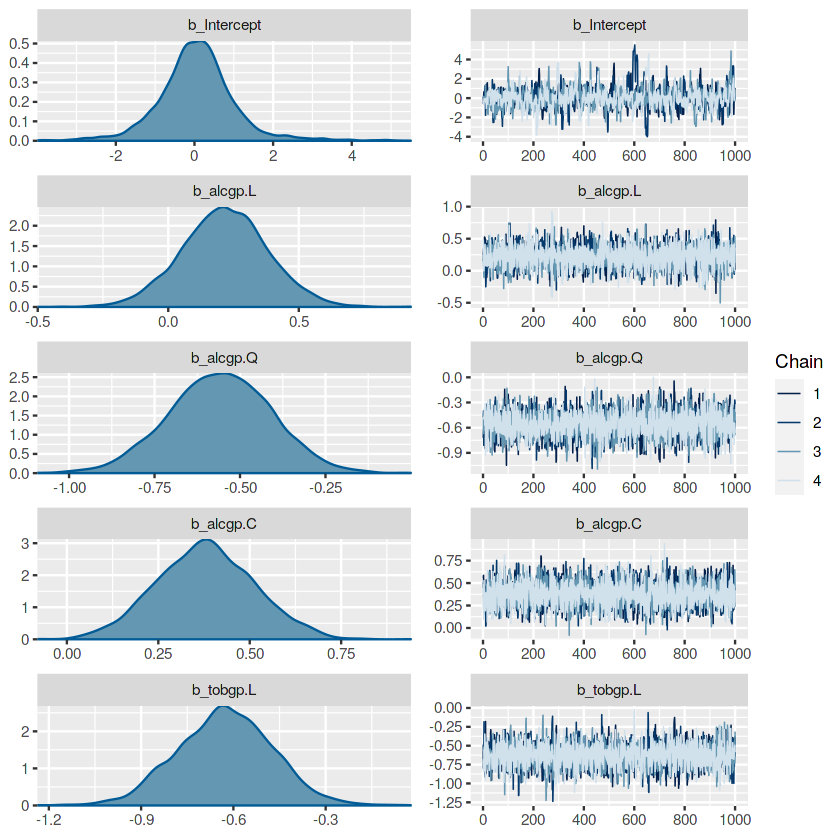

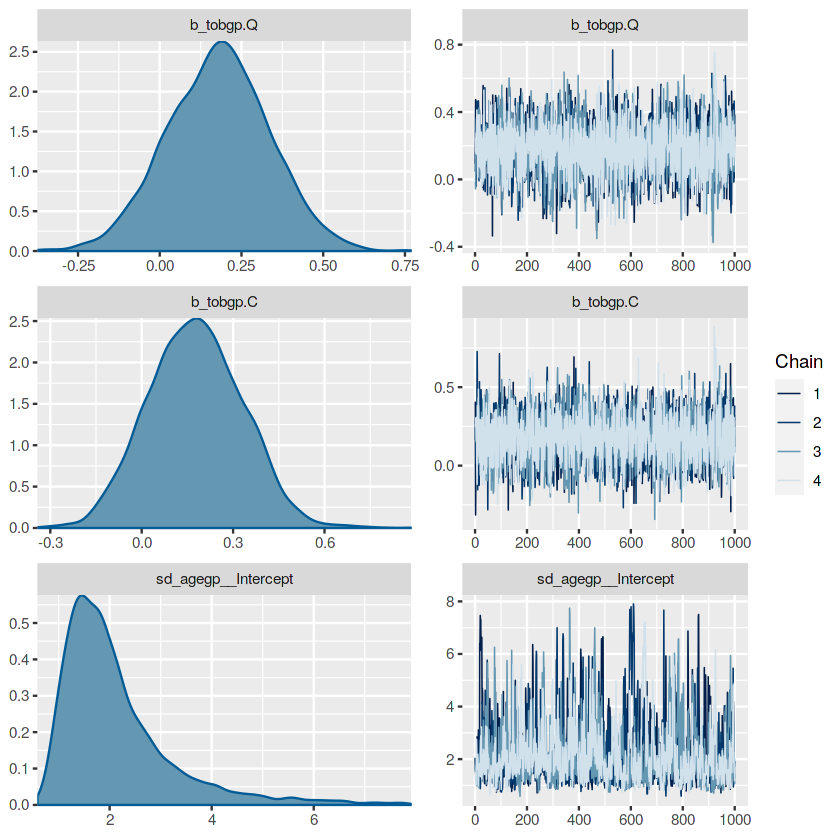

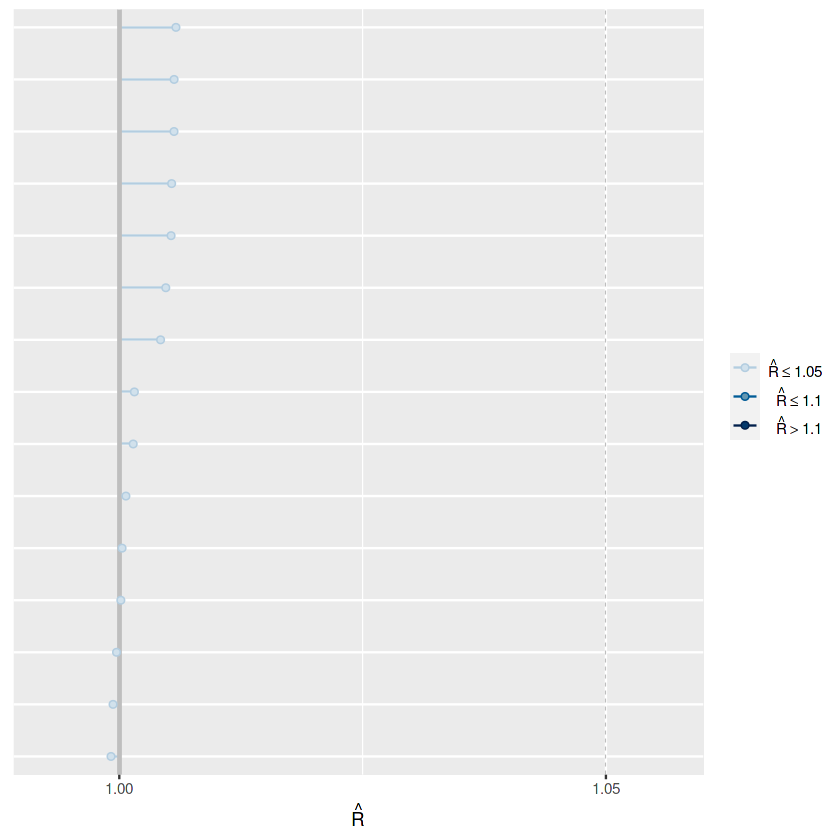

In [7]:
plot(glmm_poiss_brms)
stanplot(glmm_poiss_brms, type="rhat")

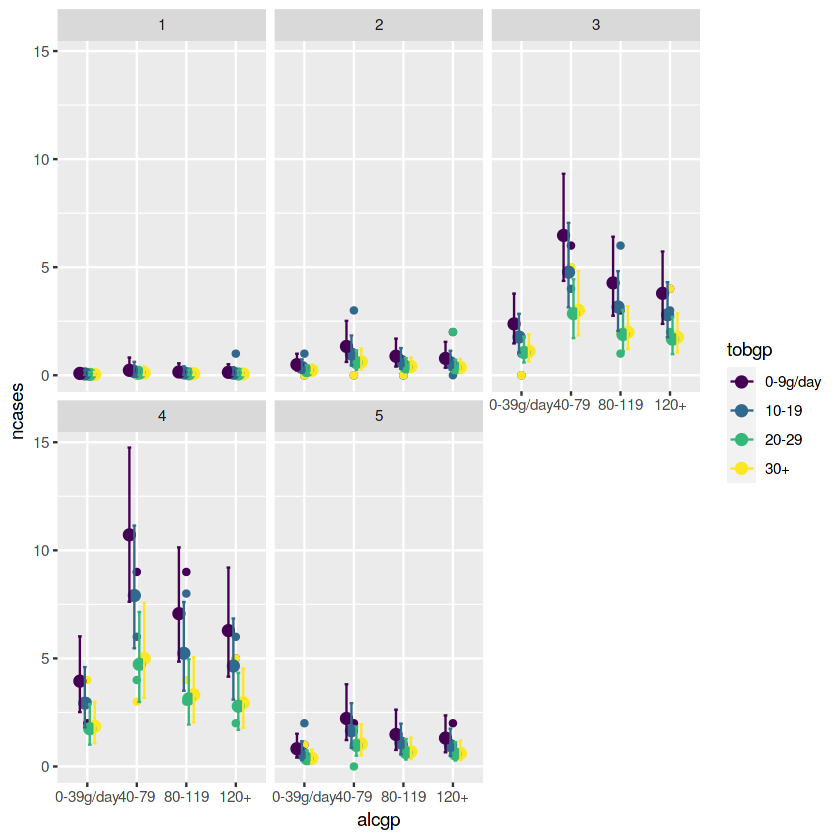

In [8]:
conditions <- data.frame(
 agegp = c("25-34", "35-44","45-54","55-64","75+"))

eff_glmm <- marginal_effects(
    glmm_poiss_brms,
    effects = "alcgp:tobgp",
    re_formula = NULL,
    conditions = conditions
)

plot(eff_glmm, points = TRUE)